### Housing Prices Analytics
#### Topic: Analyze previous year's home price in Los Angeles
    Katherine Le and Miranda Rendon


In [48]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# load datasets
prices = pd.read_csv("MedianPricesofExistingDetachedHomesHistoricalData.csv")
timeOnMarket = pd.read_csv("MedianTimeonMarketofExistingDetachedHomesHistoricalData.csv")
unsoldInv = pd.read_csv("UnsoldInventoryIndexofExistingDetachedHomesHistoricalData.csv")

In [50]:
# get LA data from each set in a new df
housingData = pd.DataFrame({
    'Mon-Yr' : prices['Mon-Yr'],
    'Median Price' : prices['Los Angeles'],
    'Median Time on Market' : timeOnMarket['LA'],
    'Unsold Inventory' : unsoldInv['Los Angeles']

})

# remove incomplete 2024 data
housingData = housingData.iloc[:-8]

# clean prices data and convert to numeric
housingData['Median Price'] = housingData['Median Price'].replace({'\\$':'',',':''}, regex=True)
housingData['Median Price'] = housingData['Median Price'].astype(int)

# save cleaned data into new file
housingData.to_csv('LAHousinData.csv', index = False)

In [51]:
# modify data frame to be sorted by year over month/year
housingDataYears = pd.read_csv('LAHousinData.csv')

# format year column 
housingDataYears['Mon-Yr'] = housingDataYears.iloc[:,0].str[-2:]
housingDataYears['Mon-Yr'] = "19" + housingDataYears['Mon-Yr']
housingDataYears['Mon-Yr'] = housingDataYears['Mon-Yr'].astype(int)

housingDataYears.loc[housingDataYears['Mon-Yr'] < 1990, 'Mon-Yr'] += 100 

# sorts and calculates average by year
avgHousingData = housingDataYears.groupby('Mon-Yr').mean()
avgHousingData = avgHousingData.round(3)

# save averaged data into new file
avgHousingData.to_csv('AvgLAHousingData.csv', index = False)


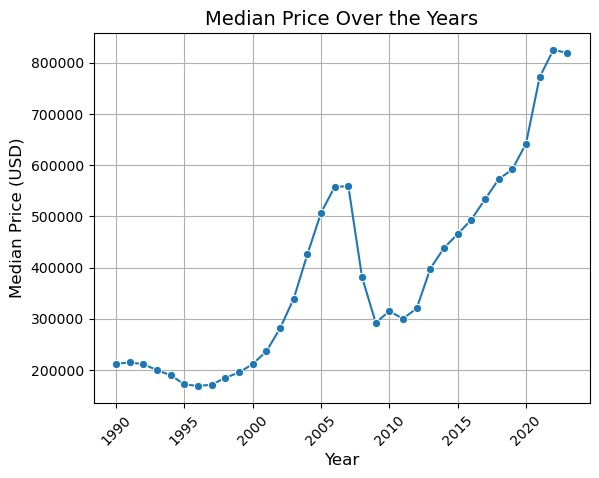

In [52]:
# create graph for median price over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Price', marker = 'o')

plt.title('Median Price Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Price (USD)', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)

plt.show()

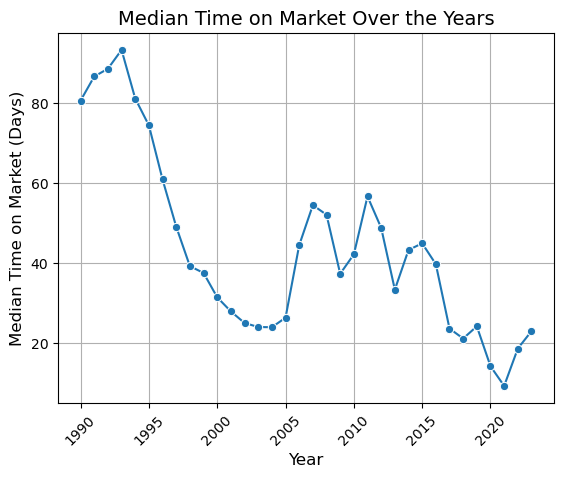

In [53]:
# create graph for median time on the market over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Median Time on Market', marker = 'o')

plt.title('Median Time on Market Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Time on Market (Days)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

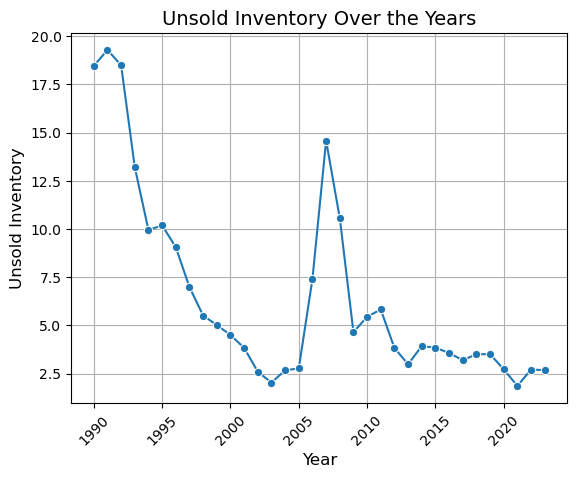

In [54]:
# create graph for unsold inventory over the years
sns.lineplot(data=avgHousingData, x='Mon-Yr', y='Unsold Inventory', marker = 'o')

plt.title('Unsold Inventory Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unsold Inventory', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()